In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_root_excluded_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          7.4937 ( 7.2387,  7.8224) ( 7.2233,  7.7944)  0.5711 (Jnode 106)\n',
 't_n56          7.3983 ( 7.1862,  7.6305) ( 7.1858,  7.6296)  0.4438 (Jnode 105)\n',
 't_n57          6.9502 ( 6.8050,  7.0973) ( 6.8005,  7.0914)  0.2909 (Jnode 104)\n',
 't_n58          6.4701 ( 6.3723,  6.5635) ( 6.3721,  6.5631)  0.1910 (Jnode 103)\n',
 't_n59          6.3264 ( 6.2347,  6.4114) ( 6.2362,  6.4124)  0.1762 (Jnode 102)\n',
 't_n60          6.1441 ( 6.0584,  6.2264) ( 6.0581,  6.2260)  0.1680 (Jnode 101)\n',
 't_n61          5.8754 ( 5.7849,  5.9648) ( 5.7849,  5.9643)  0.1794 (Jnode 100)\n',
 't_n62          3.8370 ( 3.3380,  4.3495) ( 3.3451,  4.3530)  1.0079 (Jnode 99)\n',
 't_n63          5.1594 ( 5.0606,  5.2626) ( 5.0592,  5.2604)  0.2012 (Jnode 98)\n',
 't_n64          4.5268 ( 4.4700,  4.5901) ( 4.4689,  4.5885)  0.1196 (Jnode 97)\n',
 't_n65          4.2179 ( 4.2070,  4.2474) ( 4.2060,  4.2403)  0.0343 (Jnode 96)\n',
 't_n66          3.5762 ( 3.5283,  3.6274) ( 3.5269,  3.62

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
#
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[7.4937,
 7.3983,
 6.9502,
 6.4701,
 6.3264,
 6.1441,
 5.8754,
 3.837,
 5.1594,
 4.5268,
 4.2179,
 3.5762,
 3.1836,
 1.9964,
 0.9023,
 4.5002,
 6.1698,
 5.6117,
 5.8869,
 5.0396,
 4.5903,
 5.0674,
 6.2104,
 6.0187,
 5.8885,
 5.7199,
 5.5055,
 5.3884,
 5.168,
 4.9933,
 4.7366,
 4.0575,
 3.6717,
 5.1139,
 4.5313,
 6.1197,
 2.3694,
 6.0102,
 5.7969,
 5.4902,
 5.3047,
 4.5595,
 4.7632,
 5.3274,
 5.0687,
 4.6127,
 4.2129,
 4.8298,
 6.4164,
 5.3071,
 3.786,
 3.5427,
 6.1757]

In [7]:
lower_ci_iqtree

[0.2387,
 0.1862,
 0.805,
 0.3723,
 0.2347,
 0.0584,
 0.7849,
 0.338,
 0.0606,
 0.47,
 0.207,
 0.5283,
 0.1799,
 0.9123,
 0.7446,
 0.2707,
 0.0802,
 0.443,
 0.8018,
 0.7845,
 0.263,
 0.044,
 0.1316,
 0.948,
 0.8218,
 0.6579,
 0.4576,
 0.3466,
 0.1441,
 0.9895,
 0.6741,
 0.8399,
 0.3879,
 0.0173,
 0.2861,
 0.0472,
 0.6068,
 0.9448,
 0.7494,
 0.4738,
 0.2999,
 0.3649,
 0.705,
 0.2411,
 0.9561,
 0.44,
 0.8287,
 0.5052,
 0.3161,
 0.0114,
 0.2625,
 0.7785,
 0.7395]

In [8]:
upper_ci_iqtree

[7.8224,
 7.6305,
 7.0973,
 6.5635,
 6.4114,
 6.2264,
 5.9648,
 4.3495,
 5.2626,
 4.5901,
 4.2474,
 3.6274,
 3.1937,
 2.0465,
 1.0588,
 4.6838,
 6.256,
 5.7809,
 5.9714,
 5.18,
 4.7871,
 5.1267,
 6.2875,
 6.0901,
 5.9562,
 5.7828,
 5.5568,
 5.4339,
 5.1964,
 5.0031,
 4.792,
 4.2431,
 3.9213,
 5.1987,
 4.7225,
 6.1913,
 3.3459,
 6.0752,
 5.8452,
 5.5075,
 5.3171,
 4.7196,
 4.8495,
 5.4084,
 5.1748,
 4.7872,
 4.5392,
 5.1211,
 6.5469,
 5.6332,
 4.4219,
 4.1606,
 6.7534]

In [9]:
file_LG = open("LG_root_excluded_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

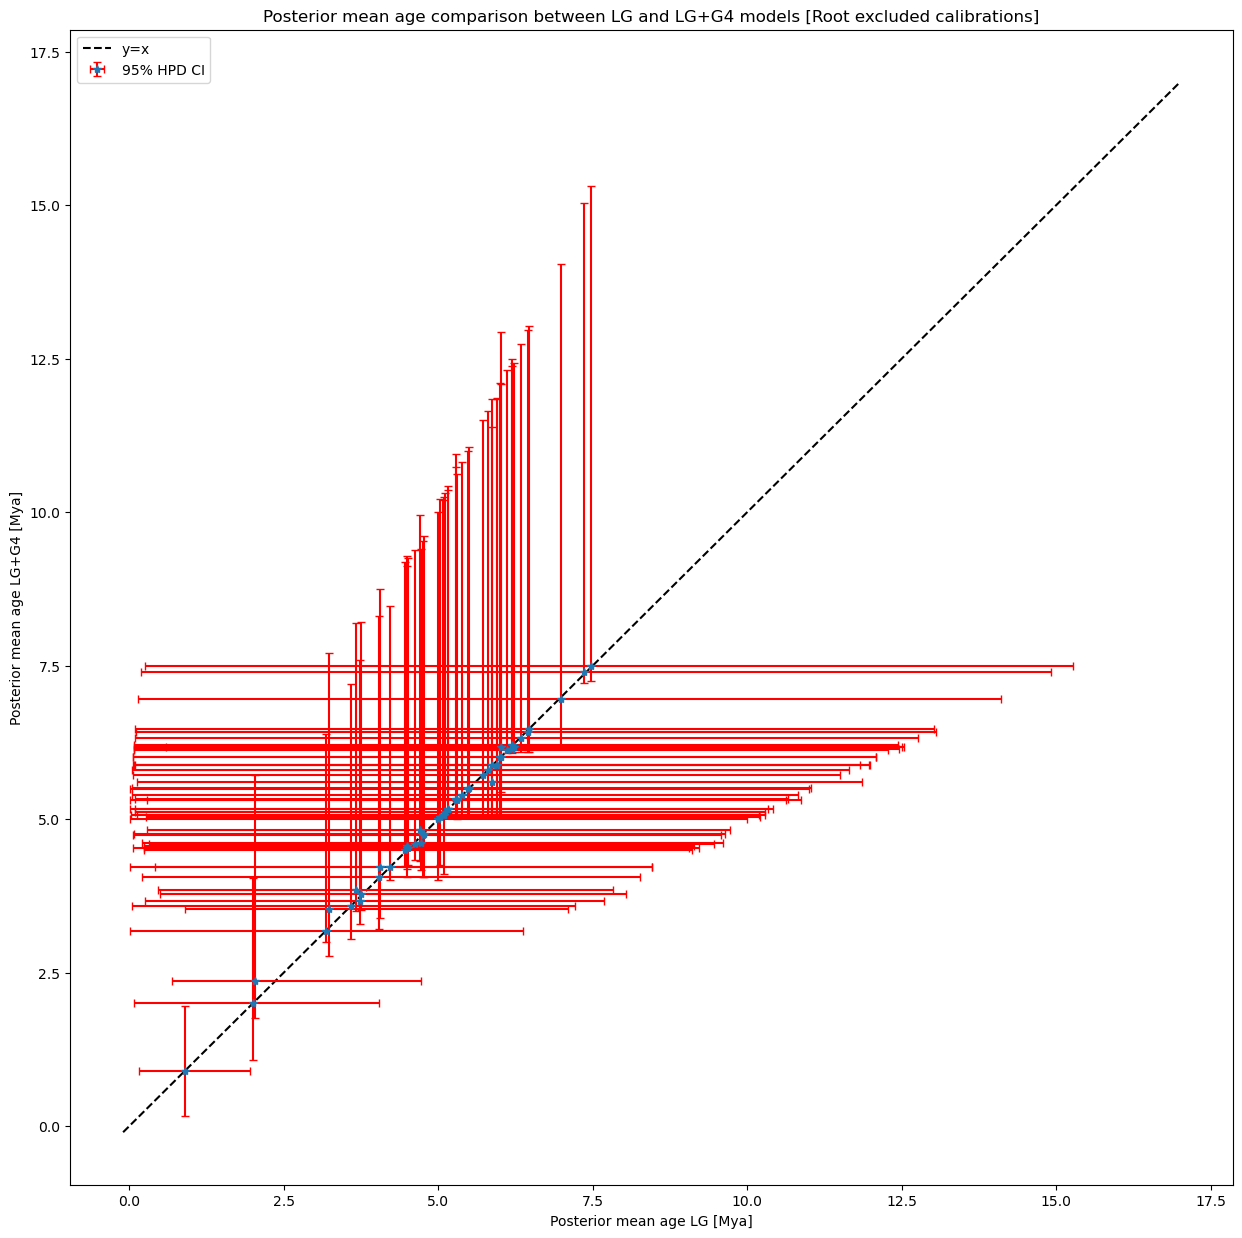

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 models [Root excluded calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_re.png')

In [11]:
posterior_mean_baseml

[7.4713,
 7.3534,
 6.9825,
 6.4629,
 6.3409,
 6.1845,
 5.9418,
 3.6732,
 5.1553,
 4.4956,
 4.2174,
 3.5812,
 3.1836,
 1.9965,
 0.9017,
 4.4532,
 6.2253,
 5.8626,
 5.9512,
 5.0215,
 4.6203,
 5.0681,
 6.186,
 6.0057,
 5.8756,
 5.7169,
 5.4935,
 5.3855,
 5.1575,
 4.9935,
 4.7564,
 4.0369,
 3.7266,
 5.101,
 4.51,
 6.1035,
 2.0386,
 6.0084,
 5.7968,
 5.4871,
 5.3054,
 4.4902,
 4.776,
 5.2877,
 5.0956,
 4.7194,
 4.0586,
 4.7,
 6.4542,
 5.281,
 3.7439,
 3.226,
 6.0106]

In [12]:
posterior_mean_iqtree

[7.4937,
 7.3983,
 6.9502,
 6.4701,
 6.3264,
 6.1441,
 5.8754,
 3.837,
 5.1594,
 4.5268,
 4.2179,
 3.5762,
 3.1836,
 1.9964,
 0.9023,
 4.5002,
 6.1698,
 5.6117,
 5.8869,
 5.0396,
 4.5903,
 5.0674,
 6.2104,
 6.0187,
 5.8885,
 5.7199,
 5.5055,
 5.3884,
 5.168,
 4.9933,
 4.7366,
 4.0575,
 3.6717,
 5.1139,
 4.5313,
 6.1197,
 2.3694,
 6.0102,
 5.7969,
 5.4902,
 5.3047,
 4.5595,
 4.7632,
 5.3274,
 5.0687,
 4.6127,
 4.2129,
 4.8298,
 6.4164,
 5.3071,
 3.786,
 3.5427,
 6.1757]

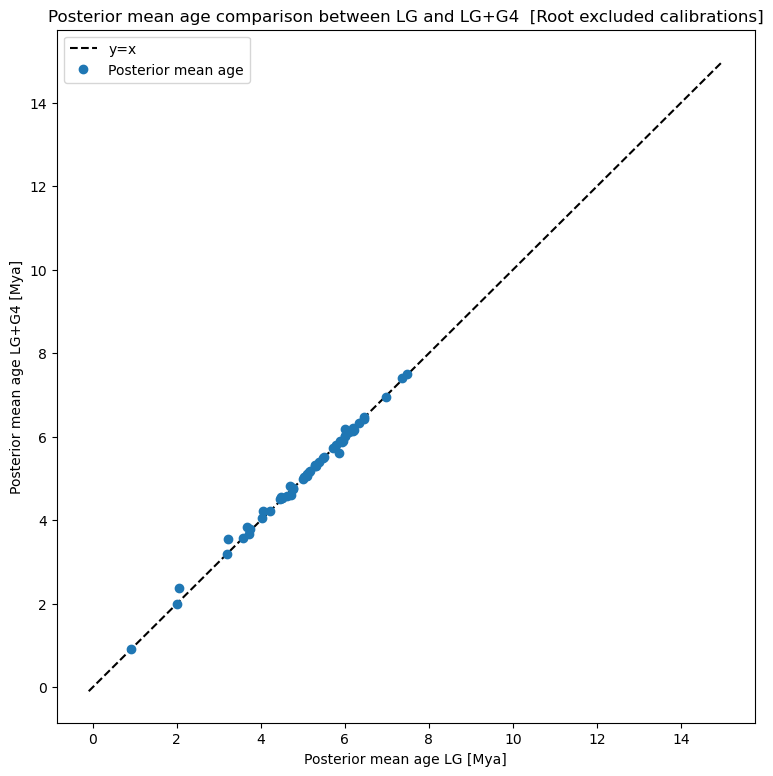

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,15], 
        [-0.1, 15], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 [Root excluded calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_re_scatter.png')